<a href="https://colab.research.google.com/github/uldom/Charity_Funding_Predictor/blob/main/Charity_Funding_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving charity_data.csv to charity_data.csv


In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("/content/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ['EIN','NAME'])


In [5]:
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [6]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [7]:
# Look at APPLICATION_TYPE value counts for binning
counts = application_df['APPLICATION_TYPE'].value_counts()
counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [8]:
type(counts)
counts.index
list(counts[counts<500].index)

['T9', 'T13', 'T12', 'T2', 'T14', 'T25', 'T29', 'T15', 'T17']

In [9]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(counts[counts<500].index)
application_types_to_replace


['T9', 'T13', 'T12', 'T2', 'T14', 'T25', 'T29', 'T15', 'T17']

In [10]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [11]:
# Look at CLASSIFICATION value counts for binning
counts2 = application_df['CLASSIFICATION'].value_counts()
counts2

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2570        1
C1570        1
C2190        1
C6100        1
C3700        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [20]:
# You may find it helpful to look at CLASSIFICATION value counts >1
counts3 = counts2[counts2>0]
counts3

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2570        1
C1570        1
C2190        1
C6100        1
C3700        1
Name: CLASSIFICATION, Length: 71, dtype: int64

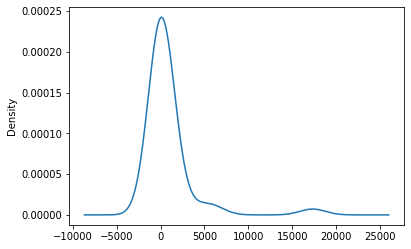

In [21]:
application_df.CLASSIFICATION.value_counts().plot.density()

In [22]:
type(counts3)
counts3.index
list(counts3[counts3<100].index)

['C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C6000',
 'C1800',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1237',
 'C1235',
 'C7210',
 'C1720',
 'C2400',
 'C4100',
 'C1600',
 'C1257',
 'C2710',
 'C0',
 'C1260',
 'C1246',
 'C1256',
 'C1234',
 'C3200',
 'C1267',
 'C2561',
 'C1236',
 'C1732',
 'C2380',
 'C8210',
 'C2150',
 'C1283',
 'C4500',
 'C4200',
 'C2500',
 'C1370',
 'C2600',
 'C1900',
 'C2170',
 'C1728',
 'C1580',
 'C1248',
 'C1820',
 'C5200',
 'C4120',
 'C1245',
 'C2570',
 'C1570',
 'C2190',
 'C6100',
 'C3700']

In [23]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
classification_types_to_replace = list(counts3[counts3<100].index)
classification_types_to_replace


['C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C6000',
 'C1800',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1237',
 'C1235',
 'C7210',
 'C1720',
 'C2400',
 'C4100',
 'C1600',
 'C1257',
 'C2710',
 'C0',
 'C1260',
 'C1246',
 'C1256',
 'C1234',
 'C3200',
 'C1267',
 'C2561',
 'C1236',
 'C1732',
 'C2380',
 'C8210',
 'C2150',
 'C1283',
 'C4500',
 'C4200',
 'C2500',
 'C1370',
 'C2600',
 'C1900',
 'C2170',
 'C1728',
 'C1580',
 'C1248',
 'C1820',
 'C5200',
 'C4120',
 'C1245',
 'C2570',
 'C1570',
 'C2190',
 'C6100',
 'C3700']

In [24]:
# Replace in dataframe
for cla in classification_types_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cla,"Other")


In [25]:
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [26]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df, dtype=float)
application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,AFFILIATION_Other,AFFILIATION_Regional,CLASSIFICATION_C1000,CLASSIFICATION_C1200,CLASSIFICATION_C1270,CLASSIFICATION_C1700,CLASSIFICATION_C2000,CLASSIFICATION_C2100,CLASSIFICATION_C2700,CLASSIFICATION_C3000,CLASSIFICATION_C4000,CLASSIFICATION_C5000,CLASSIFICATION_C7000,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
y

array([1, 1, 0, ..., 0, 1, 0])

In [31]:
X = application_df.drop('IS_SUCCESSFUL', axis=1).values
X

array([[1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 1.0859000e+05, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 5.0000000e+03, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.6500179e+07, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]])

In [32]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state= 42)

In [33]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [34]:
X_train.shape

(25724, 49)

# Model 1

In [37]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=7
hidden_nodes_layer2=14
hidden_nodes_layer3=21
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 350       
_________________________________________________________________
dense_1 (Dense)              (None, 14)                112       
_________________________________________________________________
dense_2 (Dense)              (None, 21)                315       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 22        
Total params: 799
Trainable params: 799
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [42]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
684/684 [==============================] - 2s 2ms/step - loss: 0.5426 - accuracy: 0.7346 - val_loss: 0.5428 - val_accuracy: 0.7344
Epoch 2/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5418 - accuracy: 0.7347 - val_loss: 0.5436 - val_accuracy: 0.7323
Epoch 3/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5417 - accuracy: 0.7346 - val_loss: 0.5440 - val_accuracy: 0.7341
Epoch 4/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5416 - accuracy: 0.7344 - val_loss: 0.5431 - val_accuracy: 0.7308
Epoch 5/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5415 - accuracy: 0.7339 - val_loss: 0.5442 - val_accuracy: 0.7323
Epoch 6/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5416 - accuracy: 0.7330 - val_loss: 0.5421 - val_accuracy: 0.7357
Epoch 7/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5417 - accuracy: 0.7325 - val_loss: 0.5428 - val_accuracy: 0.7341

In [43]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5515 - accuracy: 0.7293
Loss: 0.5515308976173401, Accuracy: 0.7293294668197632


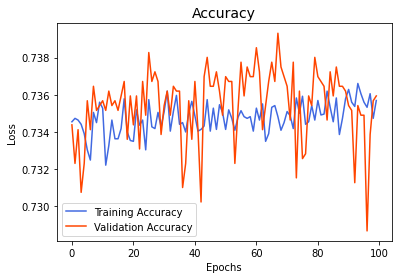

In [51]:
import matplotlib.pyplot as plt
plt.plot(fit_model.history['accuracy'], 'royalblue', label='Training Accuracy')
plt.plot(fit_model.history['val_accuracy'], 'orangered',label='Validation Accuracy')
plt.title('Accuracy',fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


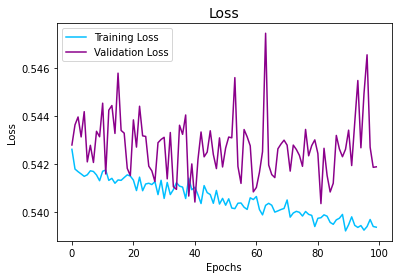

In [48]:
plt.title('Loss',fontsize=14)
plt.plot(fit_model.history['loss'], 'deepskyblue', label='Training Loss')
plt.plot(fit_model.history['val_loss'],'darkmagenta', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [49]:
# Export our model to HDF5 file
from google.colab import files

nn.save('/content/Model_1.h5')
files.download('/content/Model_1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model 2

In [52]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=80
hidden_nodes_layer2=30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# # Third hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 80)                4000      
_________________________________________________________________
dense_5 (Dense)              (None, 30)                2430      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 6,461
Trainable params: 6,461
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [54]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
684/684 [==============================] - 2s 2ms/step - loss: 0.5720 - accuracy: 0.7196 - val_loss: 0.5482 - val_accuracy: 0.7321
Epoch 2/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5563 - accuracy: 0.7274 - val_loss: 0.5451 - val_accuracy: 0.7323
Epoch 3/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5521 - accuracy: 0.7296 - val_loss: 0.5435 - val_accuracy: 0.7370
Epoch 4/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5496 - accuracy: 0.7319 - val_loss: 0.5435 - val_accuracy: 0.7393
Epoch 5/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5484 - accuracy: 0.7318 - val_loss: 0.5462 - val_accuracy: 0.7321
Epoch 6/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5477 - accuracy: 0.7317 - val_loss: 0.5408 - val_accuracy: 0.7393
Epoch 7/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5467 - accuracy: 0.7313 - val_loss: 0.5438 - val_accuracy: 0.7339

In [55]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5646 - accuracy: 0.7283
Loss: 0.5645986795425415, Accuracy: 0.7282798886299133


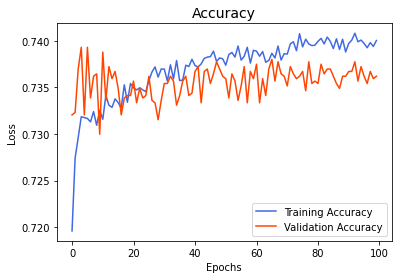

In [56]:
import matplotlib.pyplot as plt
plt.plot(fit_model.history['accuracy'], 'royalblue', label='Training Accuracy')
plt.plot(fit_model.history['val_accuracy'], 'orangered',label='Validation Accuracy')
plt.title('Accuracy',fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


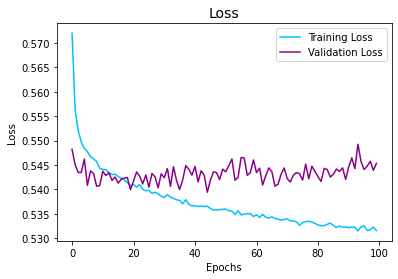

In [57]:
plt.title('Loss',fontsize=14)
plt.plot(fit_model.history['loss'], 'deepskyblue', label='Training Loss')
plt.plot(fit_model.history['val_loss'],'darkmagenta', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [61]:
# Export our model to HDF5 file
from google.colab import files

nn.save('/content/Model_2.h5')
files.download('/content/Model_2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model 3

In [62]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=2
hidden_nodes_layer2=3

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# # Third hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 2)                 100       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 4         
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________


In [63]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [64]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
684/684 [==============================] - 2s 2ms/step - loss: 0.6582 - accuracy: 0.5882 - val_loss: 0.6104 - val_accuracy: 0.6517
Epoch 2/100
684/684 [==============================] - 1s 2ms/step - loss: 0.6080 - accuracy: 0.6718 - val_loss: 0.5914 - val_accuracy: 0.6937
Epoch 3/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5991 - accuracy: 0.6785 - val_loss: 0.5873 - val_accuracy: 0.6852
Epoch 4/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5951 - accuracy: 0.6807 - val_loss: 0.5851 - val_accuracy: 0.6932
Epoch 5/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5927 - accuracy: 0.6834 - val_loss: 0.5840 - val_accuracy: 0.6934
Epoch 6/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5825 - accuracy: 0.6987 - val_loss: 0.5705 - val_accuracy: 0.7160
Epoch 7/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5775 - accuracy: 0.7066 - val_loss: 0.5692 - val_accuracy: 0.7165

In [65]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5691 - accuracy: 0.7069
Loss: 0.5691084861755371, Accuracy: 0.7069388031959534


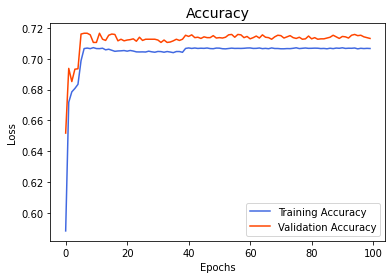

In [66]:
import matplotlib.pyplot as plt
plt.plot(fit_model.history['accuracy'], 'royalblue', label='Training Accuracy')
plt.plot(fit_model.history['val_accuracy'], 'orangered',label='Validation Accuracy')
plt.title('Accuracy',fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


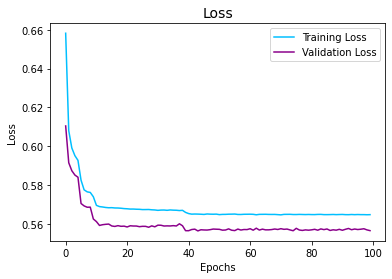

In [67]:
plt.title('Loss',fontsize=14)
plt.plot(fit_model.history['loss'], 'deepskyblue', label='Training Loss')
plt.plot(fit_model.history['val_loss'],'darkmagenta', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [68]:
# Export our model to HDF5 file
from google.colab import files

nn.save('/content/Model_3.h5')
files.download('/content/Model_3.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Model 4

In [69]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=3
hidden_nodes_layer2=27
hidden_nodes_layer3=3

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 3)                 150       
_________________________________________________________________
dense_11 (Dense)             (None, 27)                108       
_________________________________________________________________
dense_12 (Dense)             (None, 3)                 84        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 4         
Total params: 346
Trainable params: 346
Non-trainable params: 0
_________________________________________________________________


In [70]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [71]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,validation_split=0.15, epochs=100)

Epoch 1/100
684/684 [==============================] - 2s 2ms/step - loss: 0.6240 - accuracy: 0.6767 - val_loss: 0.5721 - val_accuracy: 0.7313
Epoch 2/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5760 - accuracy: 0.7228 - val_loss: 0.5595 - val_accuracy: 0.7349
Epoch 3/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5670 - accuracy: 0.7260 - val_loss: 0.5560 - val_accuracy: 0.7362
Epoch 4/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5633 - accuracy: 0.7273 - val_loss: 0.5544 - val_accuracy: 0.7346
Epoch 5/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5607 - accuracy: 0.7285 - val_loss: 0.5514 - val_accuracy: 0.7346
Epoch 6/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5596 - accuracy: 0.7281 - val_loss: 0.5529 - val_accuracy: 0.7354
Epoch 7/100
684/684 [==============================] - 1s 2ms/step - loss: 0.5581 - accuracy: 0.7296 - val_loss: 0.5517 - val_accuracy: 0.7336

In [72]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5516 - accuracy: 0.7285
Loss: 0.5515856742858887, Accuracy: 0.7285131216049194


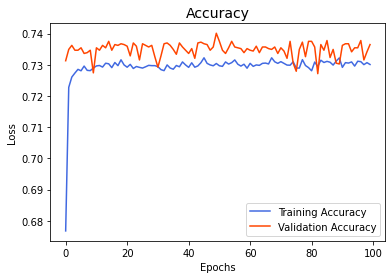

In [73]:
import matplotlib.pyplot as plt
plt.plot(fit_model.history['accuracy'], 'royalblue', label='Training Accuracy')
plt.plot(fit_model.history['val_accuracy'], 'orangered',label='Validation Accuracy')
plt.title('Accuracy',fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


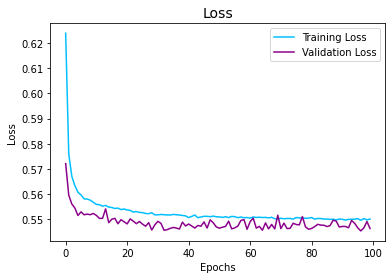

In [74]:
plt.title('Loss',fontsize=14)
plt.plot(fit_model.history['loss'], 'deepskyblue', label='Training Loss')
plt.plot(fit_model.history['val_loss'],'darkmagenta', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [75]:
# Export our model to HDF5 file
from google.colab import files

nn.save('/content/Model_4.h5')
files.download('/content/Model_4.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>